In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

3d/vfx art 별 is_converted 비율: 1.70%, 전체 갯수: 235, is_converted된 갯수: 4
5% of hotel needs 별 is_converted 비율: 0.00%, 전체 갯수: 1, is_converted된 갯수: 0
a/v project manager 별 is_converted 비율: 0.00%, 전체 갯수: 1, is_converted된 갯수: 0
account exec/manager 별 is_converted 비율: 100.00%, 전체 갯수: 2, is_converted된 갯수: 2
account management 별 is_converted 비율: 50.00%, 전체 갯수: 4, is_converted된 갯수: 2
accounting 별 is_converted 비율: 9.09%, 전체 갯수: 396, is_converted된 갯수: 36
accounts payable 별 is_converted 비율: 0.00%, 전체 갯수: 1, is_converted된 갯수: 0
admin 별 is_converted 비율: 0.00%, 전체 갯수: 2, is_converted된 갯수: 0
admin assistant 별 is_converted 비율: 0.00%, 전체 갯수: 1, is_converted된 갯수: 0
administración 별 is_converted 비율: 0.00%, 전체 갯수: 1, is_converted된 갯수: 0
administration 별 is_converted 비율: 0.00%, 전체 갯수: 2, is_converted된 갯수: 0
administrative 별 is_converted 비율: 9.65%, 전체 갯수: 3359, is_converted된 갯수: 324
administrative assistant 별 is_converted 비율: 0.00%, 전체 갯수: 3, is_converted된 갯수: 0
adminisztráció 별 is_converted 비율: 0.00%, 전체 갯수: 5,

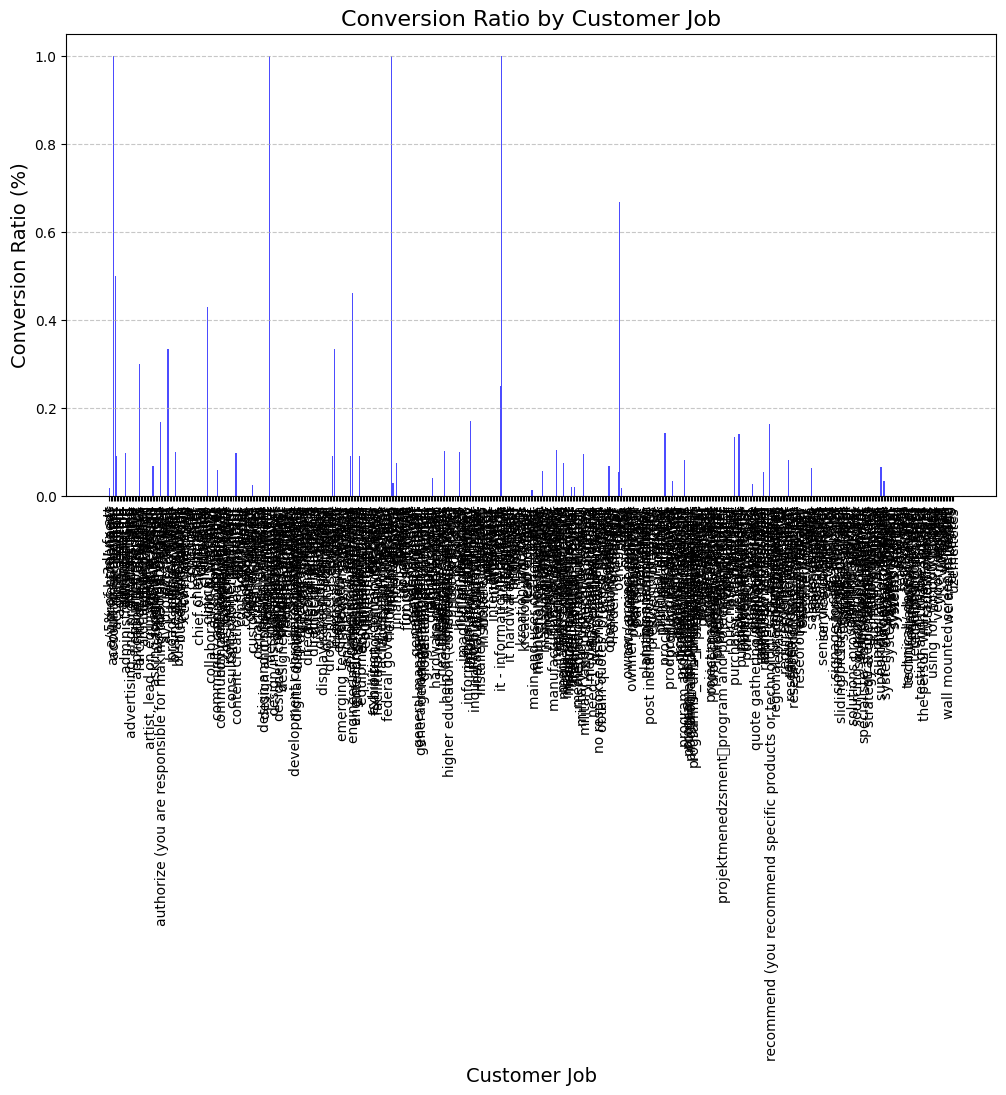

In [ ]:
df_customer_job = df.dropna(subset=['customer_job'])

converted_counts_customer_job = df_customer_job.groupby('customer_job')['is_converted'].sum().reset_index()
total_counts_customer_job = df_customer_job.groupby('customer_job')['is_converted'].count().reset_index()

ratio_df_customer_job = pd.merge(converted_counts_customer_job, total_counts_customer_job, on='customer_job', how='left')
ratio_df_customer_job['conversion_ratio'] = ratio_df_customer_job['is_converted_x'] / ratio_df_customer_job['is_converted_y']

for index, row in ratio_df_customer_job.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['customer_job']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

plt.figure(figsize=(12, 6))

plt.bar(ratio_df_customer_job['customer_job'], ratio_df_customer_job['conversion_ratio'], color='blue', alpha=0.7)

plt.title('Conversion Ratio by Customer Job', fontsize=16)
plt.xlabel('Customer Job', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)

plt.xticks(rotation='vertical')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


engineering 별 is_converted 비율: 8.92%, 전체 갯수: 6342, is_converted된 갯수: 566
other 별 is_converted 비율: 5.32%, 전체 갯수: 4852, is_converted된 갯수: 258
administrative 별 is_converted 비율: 9.65%, 전체 갯수: 3359, is_converted된 갯수: 324
education 별 is_converted 비율: 8.92%, 전체 갯수: 2287, is_converted된 갯수: 204
sales 별 is_converted 비율: 6.36%, 전체 갯수: 2218, is_converted된 갯수: 141
operations 별 is_converted 비율: 6.68%, 전체 갯수: 1961, is_converted된 갯수: 131
purchasing 별 is_converted 비율: 13.98%, 전체 갯수: 1938, is_converted된 갯수: 271
information technology 별 is_converted 비율: 16.88%, 전체 갯수: 1937, is_converted된 갯수: 327
business development 별 is_converted 비율: 9.83%, 전체 갯수: 1801, is_converted된 갯수: 177
consulting 별 is_converted 비율: 9.64%, 전체 갯수: 1349, is_converted된 갯수: 130


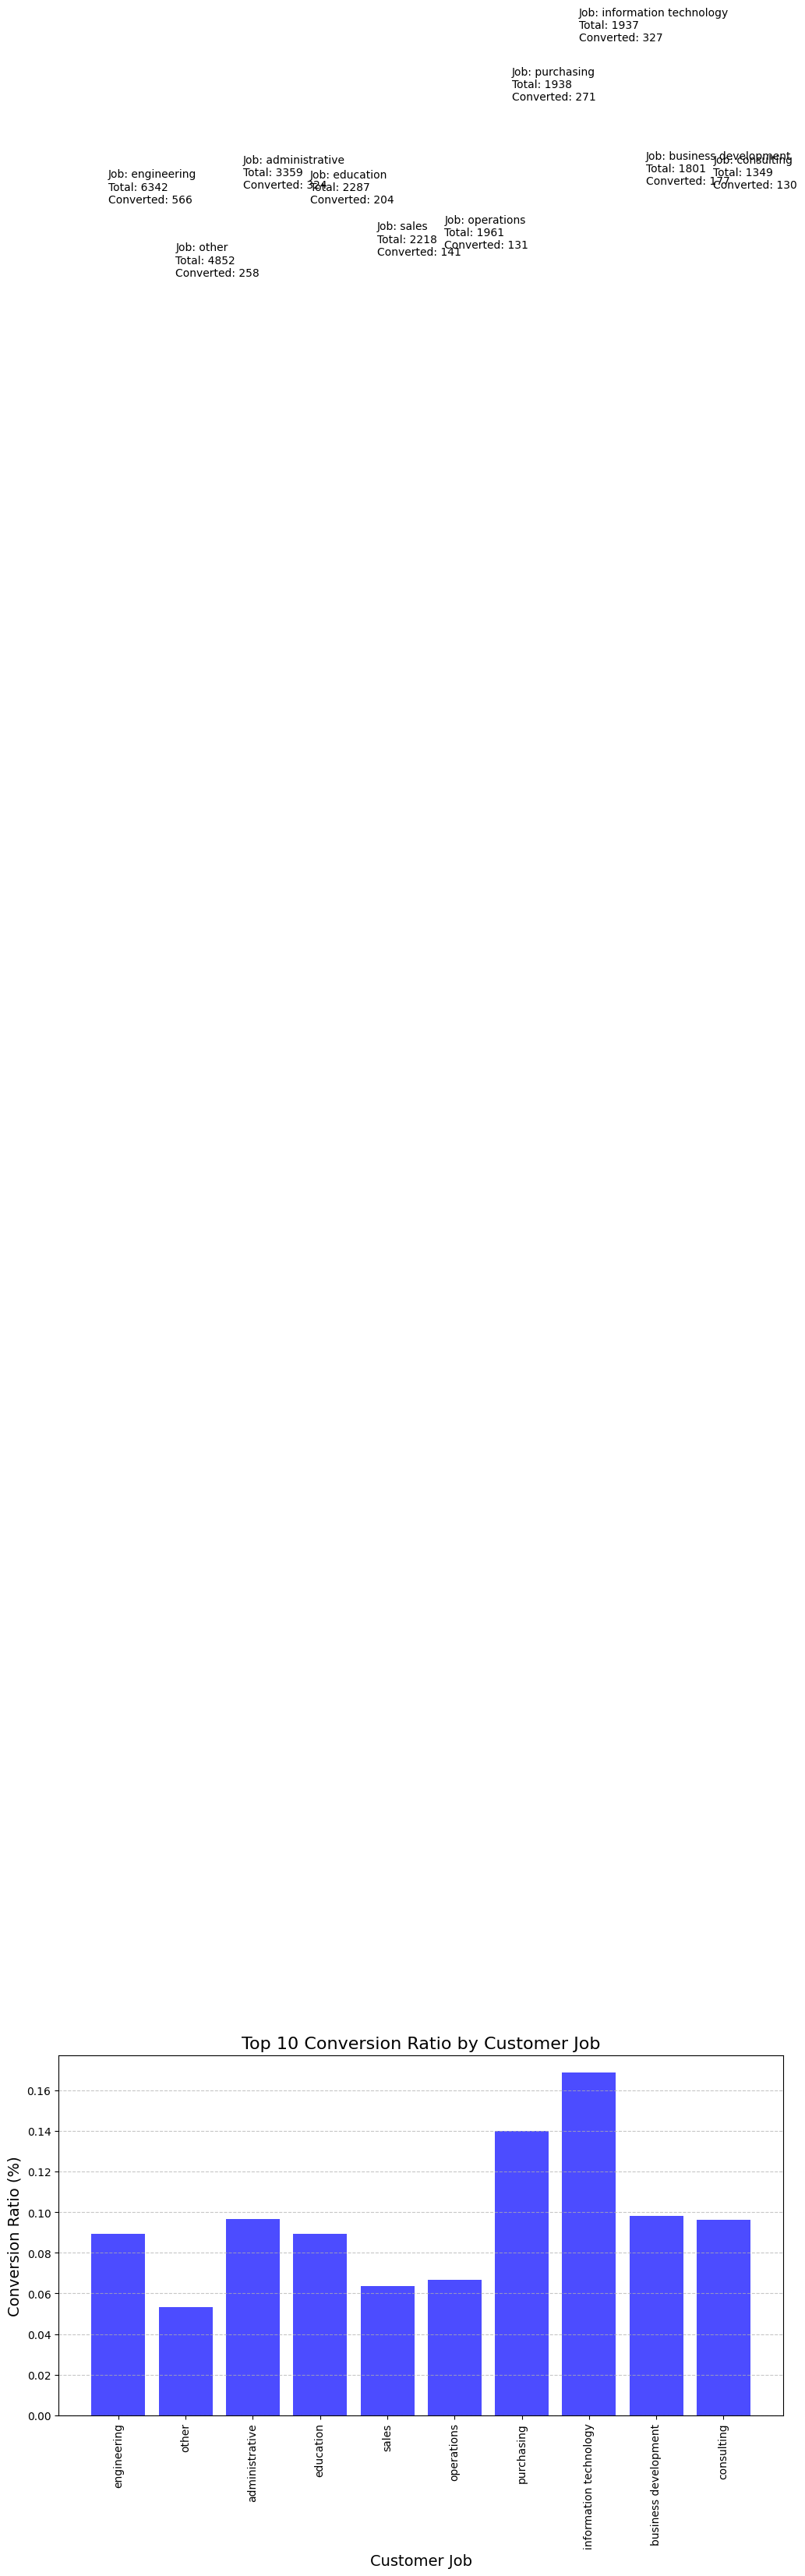

In [43]:
# 결과 출력 (Top 10)
top_10_customer_jobs = ratio_df_customer_job.nlargest(10, 'is_converted_y')

for index, row in top_10_customer_jobs.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['customer_job']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

plt.figure(figsize=(12, 6))

bars = plt.bar(top_10_customer_jobs['customer_job'], top_10_customer_jobs['conversion_ratio'], color='blue', alpha=0.7)

plt.title('Top 10 Conversion Ratio by Customer Job', fontsize=16)
plt.xlabel('Customer Job', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)

plt.xticks(rotation='vertical')

for bar, customer_job, total, converted in zip(bars, top_10_customer_jobs['customer_job'],
                                              top_10_customer_jobs['is_converted_y'], top_10_customer_jobs['is_converted_x']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'Job: {customer_job}\nTotal: {total}\nConverted: {converted}', fontsize=10, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

